In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [337]:
df = pd.read_csv("train.csv").set_index("PassengerId")
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [338]:
df = df.drop(columns=["Name", "Ticket", "Cabin"])

In [339]:
df["Sex"] = df["Sex"].apply(lambda x: 1 if x == "male" else 0)

In [340]:
df["alone"] = df.apply(lambda x: 1 if x["SibSp"] == 0 and x["Parch"] == 0 else 0,axis=1)

In [341]:
df.columns = df.columns.str.lower()

In [342]:
df.drop(columns=["sibsp", "parch"])

,survived,pclass,sex,age,fare,embarked,alone
PassengerId,,,,,,,
1,0,3,1,22.0,7.2500,S,0
2,1,1,0,38.0,71.2833,C,0
3,1,3,0,26.0,7.9250,S,1
4,1,1,0,35.0,53.1000,S,0
5,0,3,1,35.0,8.0500,S,1
...,...,...,...,...,...,...,...
887,0,2,1,27.0,13.0000,S,1
888,1,1,0,19.0,30.0000,S,1
889,0,3,0,NaN,23.4500,S,0


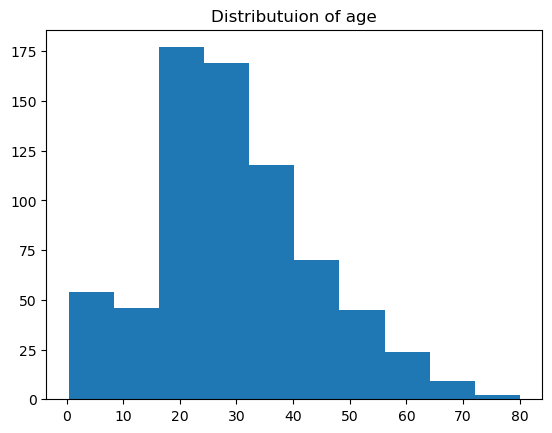

In [343]:
plt.hist(df["age"])
plt.title("Distributuion of age")
plt.show()

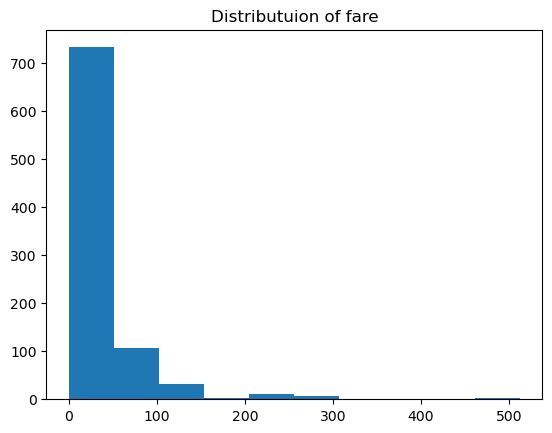

In [344]:
plt.clf()
plt.hist(df["fare"])
plt.title("Distributuion of fare")
plt.show()

In [345]:
df["fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [346]:
df["cost"] = pd.cut(x = df["fare"], bins=[1,40,100,600], labels=["low", "middle", "high"])

In [347]:
df = pd.get_dummies(df)

In [348]:
df = df.drop(columns=["fare"])

In [349]:
df["age"] = df["age"].fillna(np.mean(df["age"]))

In [350]:
X = df.drop(columns=["survived"])
X

,pclass,sex,age,sibsp,parch,alone,embarked_C,embarked_Q,embarked_S,cost_low,cost_middle,cost_high
PassengerId,,,,,,,,,,,,
1,3,1,22.000000,1,0,0,0,0,1,1,0,0
2,1,0,38.000000,1,0,0,1,0,0,0,1,0
3,3,0,26.000000,0,0,1,0,0,1,1,0,0
4,1,0,35.000000,1,0,0,0,0,1,0,1,0
5,3,1,35.000000,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,1,27.000000,0,0,1,0,0,1,1,0,0
888,1,0,19.000000,0,0,1,0,0,1,1,0,0
889,3,0,29.699118,1,2,0,0,0,1,1,0,0


In [351]:
y = df["survived"]
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: survived, Length: 891, dtype: int64

In [352]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [393]:
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(x_train, y_train)

In [394]:
clf.score(x_test, y_test)

0.7910447761194029

In [355]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [356]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

In [357]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

In [358]:
grid_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [359]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=6, random_state=42)

In [360]:
grid_search_cv.best_score_

0.818554131054131

In [361]:
grid_search_cv.best_index_

12

In [362]:
grid_search_cv.cv_results_

{'mean_fit_time': array([0.0015018 , 0.0010004 , 0.00083494, 0.0010008 , 0.0018611 ,
        0.00100128, 0.00135112, 0.0010016 , 0.00133483, 0.00152453,
        0.00133451, 0.00135032, 0.00100136, 0.00100104, 0.00166853,
        0.00100096, 0.00100128, 0.00144537, 0.00100088, 0.00166814,
        0.00100088, 0.00101113, 0.00100128, 0.00133411, 0.00100112,
        0.00133435, 0.00136248, 0.00166869, 0.00133348, 0.0010008 ,
        0.00200184, 0.00100072, 0.00116873, 0.00166893, 0.0010012 ,
        0.0012118 , 0.00116857, 0.00133451, 0.00100096, 0.00166806,
        0.00133483, 0.00133514, 0.00133435, 0.00168673, 0.00133483,
        0.00189646, 0.00133451, 0.00100136, 0.00133427, 0.0011886 ,
        0.00116841, 0.00200192, 0.00100072, 0.00166837, 0.00166829,
        0.0010008 , 0.00133459, 0.00133451, 0.00100088, 0.00166829,
        0.0010008 , 0.00166821, 0.00116833, 0.0010008 , 0.00166814,
        0.00100064, 0.00166821, 0.00100104, 0.00166829, 0.0010008 ,
        0.00166821, 0.00133459,

In [363]:
pred = pd.read_csv("test.csv").set_index("PassengerId")

In [364]:
pred = pred.drop(columns=["Name", "Ticket", "Cabin"])
pred["Sex"] = pred["Sex"].apply(lambda x: 1 if x == "male" else 0)
pred["alone"] = pred.apply(lambda x: 1 if x["SibSp"] == 0 and x["Parch"] == 0 else 0,axis=1)
pred.columns = pred.columns.str.lower()
pred.drop(columns=["sibsp", "parch"])

,pclass,sex,age,fare,embarked,alone
PassengerId,,,,,,
892,3,1,34.5,7.8292,Q,1
893,3,0,47.0,7.0000,S,0
894,2,1,62.0,9.6875,Q,1
895,3,1,27.0,8.6625,S,1
896,3,0,22.0,12.2875,S,0
...,...,...,...,...,...,...
1305,3,1,NaN,8.0500,S,1
1306,1,0,39.0,108.9000,C,1
1307,3,1,38.5,7.2500,S,1


In [365]:
pred["cost"] = pd.cut(x = pred["fare"], bins=[1,40,100,600], labels=["low", "middle", "high"])

In [366]:
pred = pd.get_dummies(pred)

In [367]:
pred = pred.drop(columns=["fare"])

In [368]:
pred["age"] = pred["age"].fillna(np.mean(pred["age"]))

In [369]:
pred

,pclass,sex,age,sibsp,parch,alone,embarked_C,embarked_Q,embarked_S,cost_low,cost_middle,cost_high
PassengerId,,,,,,,,,,,,
892,3,1,34.50000,0,0,1,0,1,0,1,0,0
893,3,0,47.00000,1,0,0,0,0,1,1,0,0
894,2,1,62.00000,0,0,1,0,1,0,1,0,0
895,3,1,27.00000,0,0,1,0,0,1,1,0,0
896,3,0,22.00000,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,1,30.27259,0,0,1,0,0,1,1,0,0
1306,1,0,39.00000,0,0,1,1,0,0,0,0,1
1307,3,1,38.50000,0,0,1,0,0,1,1,0,0


In [371]:
survived = clf.predict(pred)

In [378]:
survived

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [376]:
sol = pd.DataFrame({"PassengerId":pred.index, "Survived":survived})

In [377]:
sol

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [380]:
sol.to_csv("solution_tree.csv", index=False)

In [383]:
sffs = SFS(clf,
          k_features=12,
          forward= True,
          floating= True,
          scoring='accuracy',
          cv=0)
sffs.fit(x_train, y_train)

SequentialFeatureSelector(cv=0,
                          estimator=DecisionTreeClassifier(random_state=42),
                          floating=True, k_features=(12, 12),
                          scoring='accuracy')

In [384]:
sffs.subsets_

{1: {'feature_idx': (1,),
  'cv_scores': array([0.80417335]),
  'avg_score': 0.8041733547351525,
  'feature_names': ('sex',)},
 2: {'feature_idx': (1, 2),
  'cv_scores': array([0.83948636]),
  'avg_score': 0.8394863563402889,
  'feature_names': ('sex', 'age')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.89085072]),
  'avg_score': 0.8908507223113965,
  'feature_names': ('pclass', 'sex', 'age')},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([0.92455859]),
  'avg_score': 0.9245585874799358,
  'feature_names': ('pclass', 'sex', 'age', 'sibsp')},
 5: {'feature_idx': (0, 1, 2, 3, 8),
  'cv_scores': array([0.93900482]),
  'avg_score': 0.9390048154093098,
  'feature_names': ('pclass', 'sex', 'age', 'sibsp', 'embarked_S')},
 6: {'feature_idx': (0, 1, 2, 3, 4, 8),
  'cv_scores': array([0.94863563]),
  'avg_score': 0.9486356340288925,
  'feature_names': ('pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked_S')},
 7: {'feature_idx': (0, 1, 2, 3, 4, 6, 8),
  'cv_scores': array(

In [385]:
key_with_max_avg_score = max(sffs.subsets_, key=lambda key: sffs.subsets_[key]['avg_score'])

In [386]:
key_with_max_avg_score

8

In [387]:
predictors = list(sffs.subsets_[key_with_max_avg_score]["feature_names"])

In [388]:
predictors

['pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'embarked_C',
 'embarked_S',
 'cost_low']

In [389]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train[predictors], y_train)

DecisionTreeClassifier(random_state=42)

In [391]:
tree.score(x_test[predictors], y_test)

0.8022388059701493

In [396]:
survived2 = tree.predict(pred[predictors])

In [397]:
sol2 = pd.DataFrame({"PassengerId":pred.index, "Survived":survived2})

In [398]:
sol2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [400]:
sol

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [406]:
sol2.to_csv("solution_tree2.csv", index=False)

In [407]:
sol.compare(sol2)

Survived      
        self other
50       1.0   0.0
132      1.0   0.0
217      0.0   1.0
287      1.0   0.0
293      1.0   0.0
308      0.0   1.0
316      0.0   1.0
333      1.0   0.0
390      0.0   1.0

In [531]:
tree2 = DecisionTreeClassifier(random_state=42)

params = {'max_depth':[None,3,5,7,10,15],
          'min_samples_leaf':[2, 5],
          'min_samples_split':[2,8,10,12],
          'criterion':['gini','entropy']}
GS = GridSearchCV(estimator=tree2,param_grid=params,cv=5,n_jobs=-1, verbose=True, scoring='accuracy')

In [532]:
GS.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 10, 15],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 8, 10, 12]},
             scoring='accuracy', verbose=True)

In [533]:
GS.best_score_

0.8233419354838709

In [534]:
GS.best_score_

0.8233419354838709

In [535]:
GS.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [539]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)
tree3.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [540]:
tree3.score(x_test, y_test)

0.7835820895522388

In [541]:
tree3.score(x_train, y_train)

0.8491171749598716